In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier as RFC
from mechlearn import split_and_scale as ss
from mechlearn import roc

In [2]:
X = pd.read_csv('../Resources/X.csv')
y = pd.read_csv('../Resources/y.csv').to_numpy().ravel()
features = X.columns

In [3]:
features

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_F', 'Gender_M', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Income_Category_$120K +', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinum',
       'Car

## Results without any Dimensionality Reduciton
To start we consider the accuracy area under the ROC of the random forest classifier model trained and tested on the full dataset. This will serve as a reference for how subsequent models perform. 

In [5]:
_Xs, Xs_, _y, y_ = ss(X, y)
rfc_1 = RFC().fit(_Xs, _y)
importances = rfc_1.feature_importances_
acc_1 = rfc_1.score(Xs_, y_)
auc_1 = roc(Xs_, y_, rfc_1, 100, area=True)
print(f'Random Forest (Using Whole Dataset)\nAccuracy: {round(acc_1,4)*100}%\nROC Area: {round(auc_1,4)*100}%')

Random Forest (Using Whole Dataset)
Accuracy: 95.93%
ROC Area: 99.05000000000001%


Using the 'feature_importances_' of the RFC model, we can see which features explain the most signal-to-noise in the output and therefore are most useful (or important) to the model.

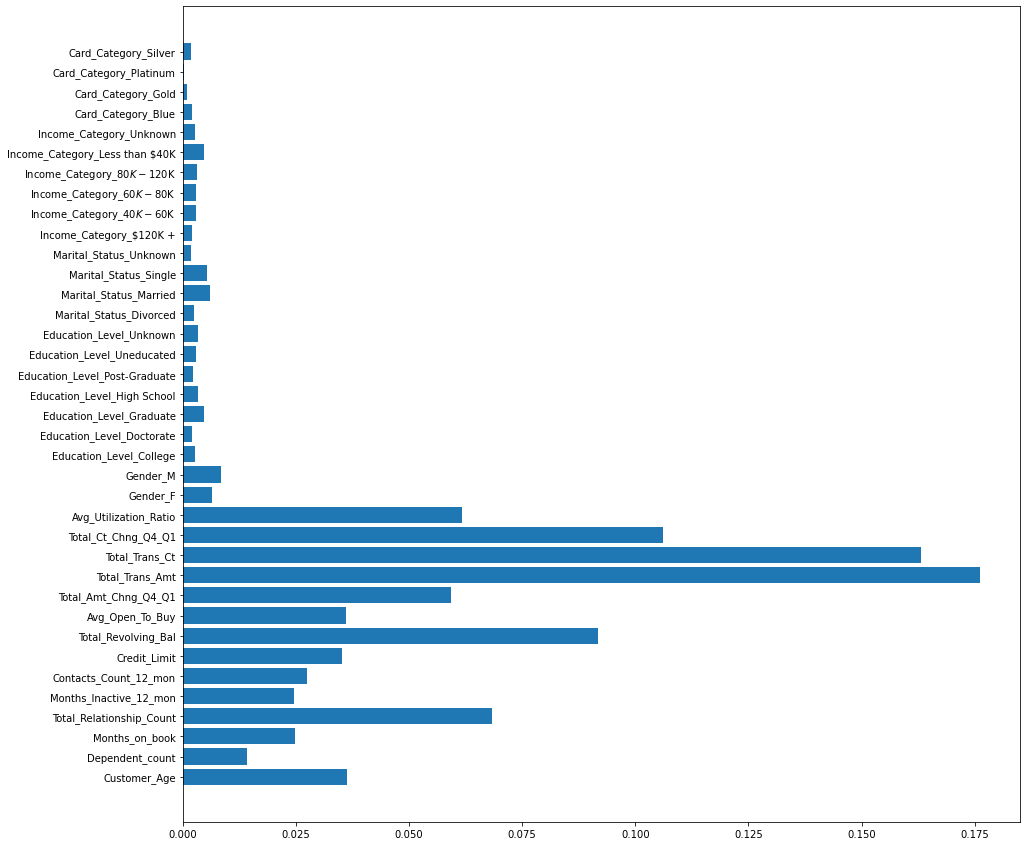

In [6]:
ticks = np.arange(len(features))
fig, ax = plt.subplots()
ax.barh(ticks, importances)
ax.set_yticks(ticks, labels=features)
fig.set_size_inches(15, 15)
plt.show()

Somewhat unsurprisingly, features that represent the customer's use of the credit, like 'Total_Trans_Ct' and 'Total_Trans_Amt' ahve the highest importance to the model. Conversly, demographic features like 'Customer_Age', 'Education_Level' and 'Income_Category' show lower importance to the model. While this could be partially explained by saying that customer use is a better indicator of attrition, it's also important to consider two things 
1. Many of the demographic features are encoded meaning each an original feature like 'Gender' is represented by mulptle features in the data, 'Gender_M' and 'Gender_F'. Becuase of this, the total feature importance could be higher than what is shown for each individual encoded compoenent feature.
1. 'Education_Level', 'Marital_Status' and 'Income_Category', all of which are demographics contain 'Unknown' values. 

In [18]:
featuresr = [features[i] for i in np.r_[0:2, 14:33]] # just demographics columns like age, education_level etc.
Xr = X.iloc[:, np.r_[0:2, 14:33]]

In [8]:
_Xrs, Xrs_, _y, y_ = ss(Xr, y)
rfc_2 = RFC().fit(_Xrs, _y)
rfc_2.score(Xrs_, y_)

0.7776461295418642

In [16]:
len(Xr.to_numpy()[1])

25

In [17]:
len(featuresr)

21